# Random Forest Classifier

The Random Forest Classifier (RFC) is a model made up of many decision trees. Rather than simply averaging the prediction of trees (which we could call a “forest”), the RFC uses two key concepts: 

(1) _Random sampling of training data when building trees._ When training, each tree learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, meaning that some samples will be used multiple times in a single tree. By training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the _entire forest_ will have lower variance but not at the cost of increasing bias. With the test set, predictions are made by averaging the predictions of each decision tree. This procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions is known as _bagging_.

(2) _Random subsets of features when splitting nodes_. Only a subset of all the features are considered for splitting each node in each decision tree. Generally this is set to 'sqrt'(n_features) for classification. So, with the current data with 15 features, this would be set to just under 4. 

#### The Random Forest Classifier performed the best out of all the models which were run. Specifically, the RFC model utilizing under-sampling, due to imbalanced data. 

#### _Below are three models_: 

#### 1. Baseline 

#### 2. Under-Sampled

#### 3. Under-Sampled with hyper-parameters tuned (FINAL)

## Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Read in the data

In [3]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,0.441595,4.416081,0.713664,0.374187,3.790430,0.054351,2.404368,0.807718,0.926998,0.532363,0.128591,0.524508,0.198235,2.765302,4.321413,3.537850,0.317053
std,0.496578,1.583006,0.452049,0.483913,1.324389,0.226710,1.168220,0.394094,0.260140,0.498952,0.334747,0.499400,0.398671,7.255185,8.825211,7.859638,0.465329
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


# 1. Baseline RFC Model:

In [4]:
# Split data by features and target
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [5]:
# Complete a 70/30 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test dataset: ", X_test.shape) 
print("Number of rows/columns in y_test dataset: ", y_test.shape) 
print("Number of rows/columns in X_train dataset: ", X_train.shape) 
print("Number of rows/columns in y_train dataset: ", y_train.shape) 

Number of rows/columns in X_test dataset:  (135005, 15)
Number of rows/columns in y_test dataset:  (135005,)
Number of rows/columns in X_train dataset:  (315011, 15)
Number of rows/columns in y_train dataset:  (315011,)


In [6]:
# Default options for RFC
# class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, 
    # min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
    # max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
    # oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None

    
# ---BASELINE MODEL---

RFC_baseline = RandomForestClassifier()
RFC_baseline.fit(X_train, y_train)
y_pred = RFC_baseline.predict(X_test)
probs = RFC_baseline.predict_proba(X_test)
probs = probs[:,1]

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83     92290
         1.0       0.67      0.48      0.56     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.73      0.68      0.70    135005
weighted avg       0.75      0.76      0.75    135005

Accuracy: 0.7589348542646569
ROC AUC score: 0.7606114555233177
Sensitivity: 0.47767763080884934
Specificity: 0.8891104128291256
Precision: 0.6659703636007572


Confusion matrix, without normalization
[[82056 10234]
 [22311 20404]]


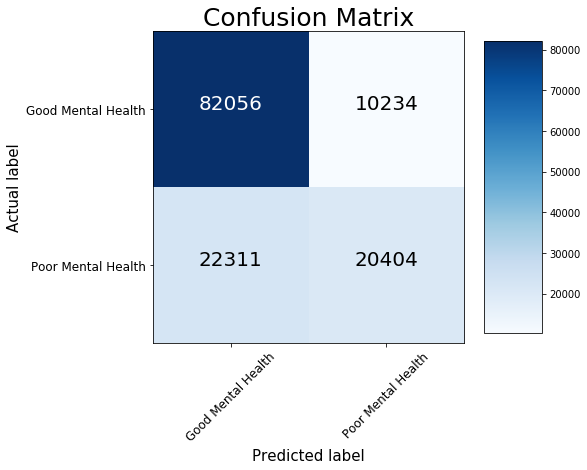

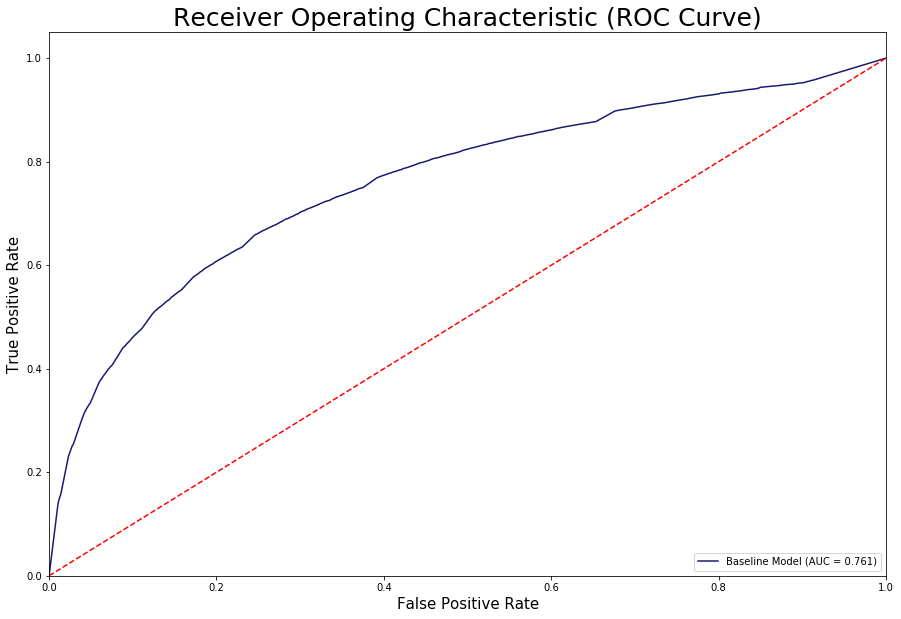

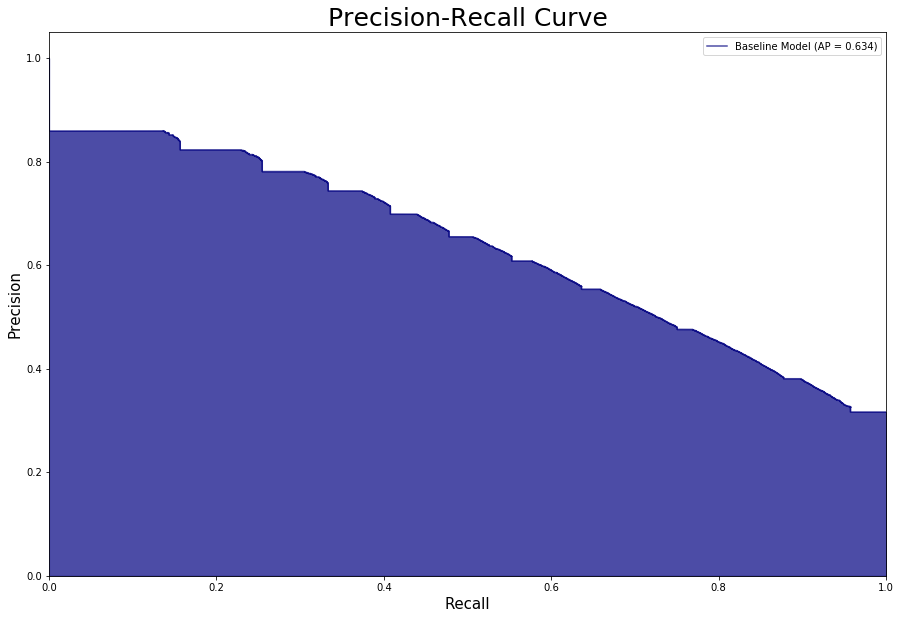

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

############################################################################################################
# CLASSIFICATION REPORT ###

print('\n')
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC score:",metrics.roc_auc_score(y_test, probs))

confusion = confusion_matrix(y_test, y_pred)
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity:",TP / float(TP + FN))
print("Specificity:",TN / float(TN + FP))
print("Precision:",TP / float(TP + FP))
print('\n')

#####################################################################################################
# CONFUSION MATRIX

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 25)
    plt.colorbar(aspect=5)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    plt.ylim([1.5, -.5])
    
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Good Mental Health', 'Poor Mental Health'],
                      title = 'Confusion Matrix')


############################################################################################
# ROC CURVE PLOT

roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Baseline Model (AUC = %0.3f)' % roc_auc, color='midnightblue')
#plt.fill_between(fpr, tpr, alpha=0.2, color='orange', **step_kwargs)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size = 15)
plt.ylabel('True Positive Rate', size = 15)
plt.title('Receiver Operating Characteristic (ROC Curve)', size = 25)
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

###########################################################################################
# PRECISION-RECALL CURVE

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, probs)

precision, recall, _ = precision_recall_curve(y_test, probs)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=(15,10))
plt.step(recall, precision, color='navy', alpha=0.7,
         where='post', label='Baseline Model (AP = %0.3f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.7, color='navy', **step_kwargs)

plt.xlabel('Recall', size=15)
plt.ylabel('Precision', size=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve', size=25)
plt.legend()
plt.show()

# Dealing with imbalanced data:

## The data is imbalanced, indicted by two things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows

### (2) The accuracy scores in the baseline model for the '1' values are far lower than the '0', showing the model is biased. It's good at predicting 'Good Mental Health', but not 'Poor Mental Health'. I ran the Random Forest with class_weight option, giving 'Poor Mental Health' a higher weight. This improved scores a bit, but not by much.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-Sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. I also tried adjusting class_weight in the baseline model and also used SMOTE-NC for Over-Sampling, however, the Under-Sampling provided the best results.

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

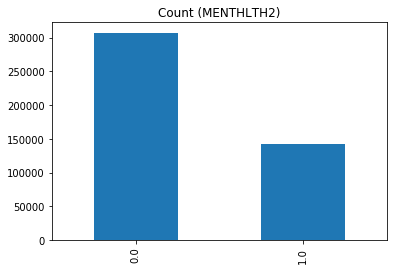

In [8]:
# Check value counts for each class of the target
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

### There are roughly twice as many value counts for the target in 'class 0' compared with 'class 1'...this is why the previous model was better at predicting 'class 0'. We'll now use under-sampling to balance the data.

In [9]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


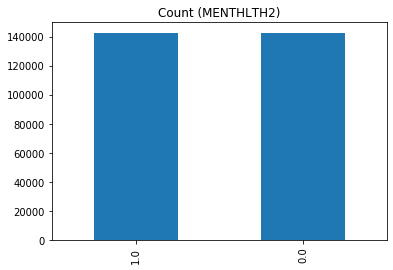

In [10]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

### You can see above that we now have an equal amount of observations for both classes of the target MENTHLTH2. We did lose a lot of information using this method, however, we still have a pretty large dataset to work with.

# 2.0 Under-Sampled Model

## Let's re-run the same model now, using the under-sampled data

In [11]:
X_under = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_under = LLCP2_under['MENTHLTH2'].values

In [12]:
# 70/30 train-test split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_under dataset: ", X_test_under.shape) 
print("Number of rows/columns in y_test_under dataset: ", y_test_under.shape) 
print("Number of rows/columns in X_train_under dataset: ", X_train_under.shape) 
print("Number of rows/columns in y_train_under dataset: ", y_train_under.shape) 

Number of rows/columns in X_test_under dataset:  (85608, 15)
Number of rows/columns in y_test_under dataset:  (85608,)
Number of rows/columns in X_train_under dataset:  (199750, 15)
Number of rows/columns in y_train_under dataset:  (199750,)


In [13]:
# Check the unique counts for the target classes
unique, counts = np.unique(y_train_under, return_counts=True)
dict(zip(unique, counts))

{0.0: 99974, 1.0: 99776}

In [14]:
# ---UNDER-SAMPLED MODEL---

RFC_under = RandomForestClassifier()
RFC_under.fit(X_train_under, y_train_under)
y_pred_under = RFC_under.predict(X_test_under)   #yields predicted class 0/1
probs_under = RFC_under.predict_proba(X_test_under)
probs_under = probs_under[:,1]    #yields probability of either class 0-1

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72     42705
         1.0       0.73      0.64      0.68     42903

   micro avg       0.70      0.70      0.70     85608
   macro avg       0.71      0.70      0.70     85608
weighted avg       0.71      0.70      0.70     85608

Accuracy: 0.7019554247266611
ROC AUC score: 0.761725666334119
Sensitivity: 0.6370883155024124
Specificity: 0.7671232876712328
Precision: 0.733220666344761




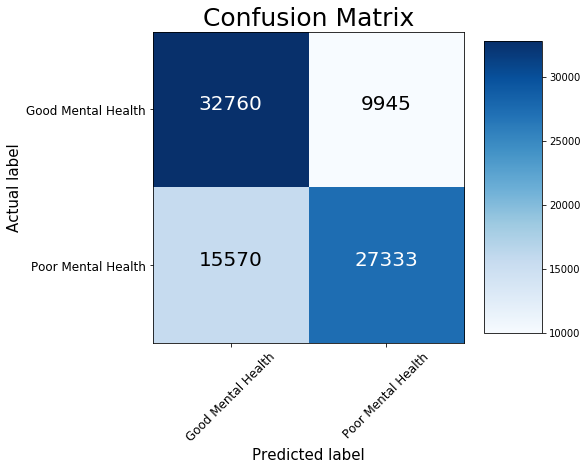

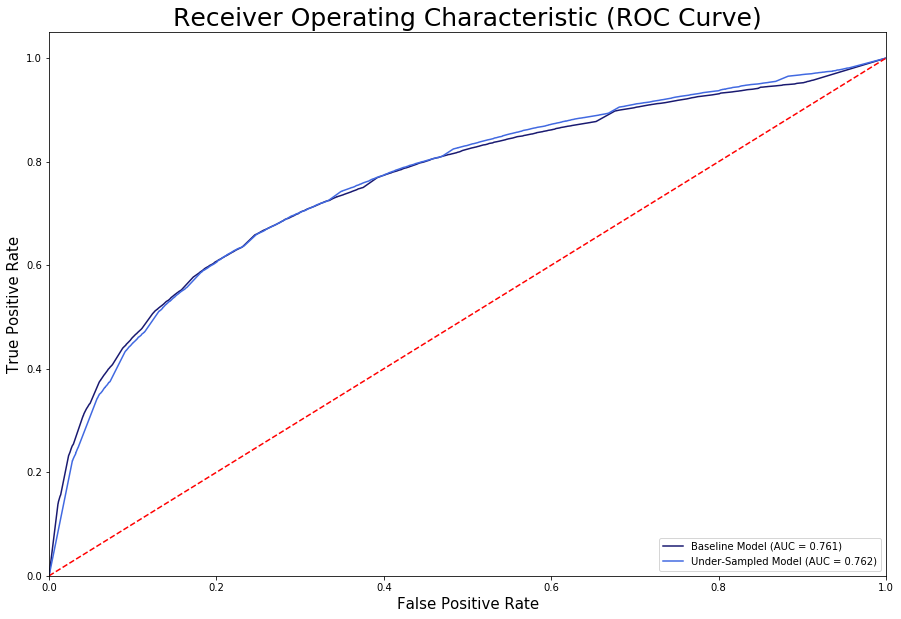

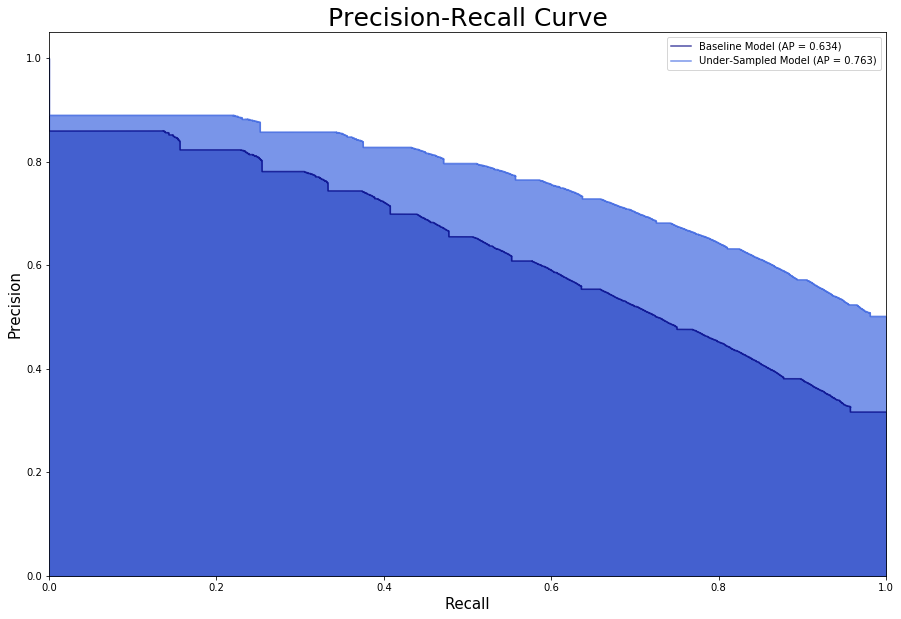

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

############################################################################################################
# CLASSIFICATION REPORT ###

print('\n')
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test_under, y_pred_under))
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))
print("ROC AUC score:",metrics.roc_auc_score(y_test_under, probs_under))

confusion1 = confusion_matrix(y_test_under, y_pred_under)
# True Positives
TP_under = confusion1[1, 1]
# True Negatives
TN_under = confusion1[0, 0]
# False Positives
FP_under = confusion1[0, 1]
# False Negatives
FN_under = confusion1[1, 0]
print("Sensitivity:",TP_under / float(TP_under + FN_under))
print("Specificity:",TN_under / float(TN_under + FP_under))
print("Precision:",TP_under / float(TP_under + FP_under))

#####################################################################################################
# CONFUSION MATRIX

print('\n')
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """

    # Plot the confusion matrix
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 25)
    plt.colorbar(aspect=5)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    plt.ylim([1.5, -.5])

cm = confusion_matrix(y_test_under, y_pred_under)
plot_confusion_matrix(cm, classes = ['Good Mental Health', 'Poor Mental Health'],
                      title = 'Confusion Matrix')
plt.show()
############################################################################################
# ROC CURVE PLOT

roc_auc_under = roc_auc_score(y_test_under, probs_under)
fpr_under, tpr_under, thresholds = roc_curve(y_test_under, probs_under)
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Baseline Model (AUC = %0.3f)' % roc_auc, color='midnightblue')
#plt.fill_between(fpr, tpr, alpha=0.2, color='midnightblue', **step_kwargs)
plt.plot(fpr_under, tpr_under, label='Under-Sampled Model (AUC = %0.3f)' % roc_auc_under, color='royalblue')
#plt.fill_between(fpr_under, tpr_under, alpha=0.2, color='royalblue', **step_kwargs)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size = 15)
plt.ylabel('True Positive Rate', size = 15)
plt.title('Receiver Operating Characteristic (ROC Curve)', size = 25)
plt.legend(loc="lower right")
plt.show()

###########################################################################################
# PRECISION-RECALL CURVE

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score

average_precision_under = average_precision_score(y_test_under, probs_under)

precision_under, recall_under, _ = precision_recall_curve(y_test_under, probs_under)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=(15,10))
plt.step(recall, precision, color='navy', alpha=0.7,
         where='post', label='Baseline Model (AP = %0.3f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.7, color='navy', **step_kwargs)

plt.step(recall_under, precision_under, color='royalblue', alpha=0.7,
         where='post', label='Under-Sampled Model (AP = %0.3f)' % average_precision_under)
plt.fill_between(recall_under, precision_under, alpha=0.7, color='royalblue', **step_kwargs)

plt.xlabel('Recall', size=15)
plt.ylabel('Precision', size=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve', size=25)
plt.legend()
plt.show()

### For this model, the average accuracy score dropped, though the classes are much more balanced. The AUC is similar. This model is better at predicting both classes, which is important. Let's tune the hyper-parameters, to see if we can improve the model further.

# 3. Under-Sampled Model with Hyper-Parameters Tuned (FINAL)

### We'll use RandomizedSearchCV for tuning

In [16]:
# 70/30 split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_final dataset: ", X_test_final.shape) 
print("Number of rows/columns in y_test_final dataset: ", y_test_final.shape) 
print("Number of rows/columns in X_train_final dataset: ", X_train_final.shape) 
print("Number of rows/columns in y_train_final dataset: ", y_train_final.shape) 

Number of rows/columns in X_test_final dataset:  (85608, 15)
Number of rows/columns in y_test_final dataset:  (85608,)
Number of rows/columns in X_train_final dataset:  (199750, 15)
Number of rows/columns in y_train_final dataset:  (199750,)


In [31]:
# Define parameters to be tuned

from sklearn.model_selection import RandomizedSearchCV  
from pprint import pprint

# Number of trees in RFC
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt',2,3,4,5,6,7,8,9,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,5,6,8,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,6,8,10,20,30,40,50,60]
# Method of selecting samples for training each tree
bootstrap = [True, False] # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30, 40, 50, 60],
 'min_samples_split': [2, 3, 5, 6, 8, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [28]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
RFC_hyper = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# Search across 50 different combinations, and use 3 available cores (n_jobs)
RFC_hyper = RandomizedSearchCV(estimator = RFC_hyper, param_distributions = random_grid, n_iter = 30, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 2)
# Fit the random search model
RFC_hyper.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 33.4min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 294.0min
exception calling callback for <Future at 0x1c9aaa78c18 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Nick\Anaconda3\lib\site-packa

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [27]:
# Print the best hyper-parameters
RFC_hyper.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

# FINAL MODEL

## Now, we'll adjust the hyper-parameters for the final model

In [18]:
# ---FINAL MODEL with hyper-parameters tuned---

RFC_final = RandomForestClassifier(n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=5,
                                   max_depth=10,bootstrap=True, random_state=47, oob_score = True)
RFC_final.fit(X_train_final, y_train_final)
y_pred_final = RFC_final.predict(X_test_final)   #yields predicted class 0/1
probs_final = RFC_final.predict_proba(X_test_final)
probs_final = probs_final[:,1]    #yields probability of either class 0-1

## Print accuracy reports



=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75     42705
         1.0       0.77      0.67      0.72     42903

   micro avg       0.73      0.73      0.73     85608
   macro avg       0.74      0.73      0.73     85608
weighted avg       0.74      0.73      0.73     85608

Accuracy: 0.7331207363797776
OOB score: 0.7330563204005006
ROC AUC score: 0.8085406559796223
Sensitivity: 0.6707456355033448
Specificity: 0.7957850368809273
Precision: 0.7674275961384607




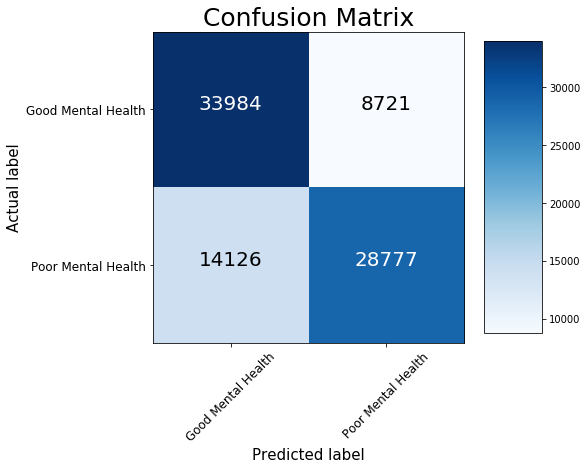

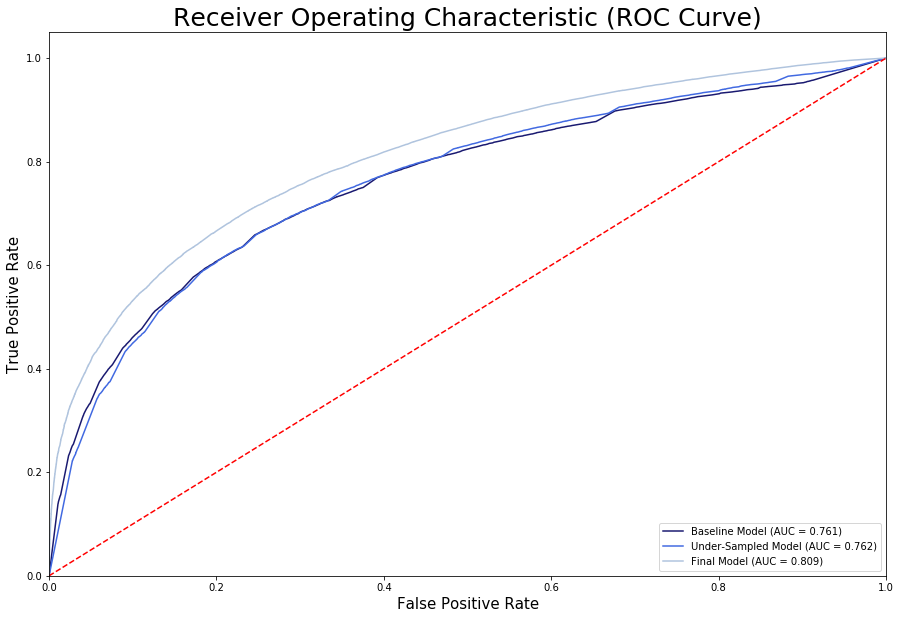

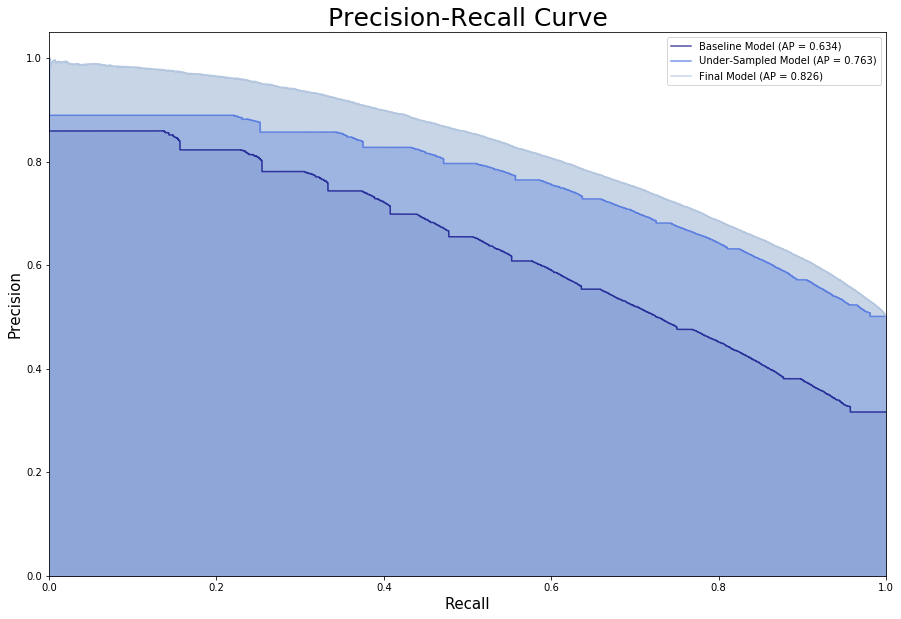

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

############################################################################################################
# CLASSIFICATION REPORT ###

print('\n')
print("=== CLASSIFICATION REPORT ===")
print(classification_report(y_test_final, y_pred_final))
print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))
print("OOB score:", RFC_final.oob_score_)
print("ROC AUC score:",metrics.roc_auc_score(y_test_final, probs_final))

confusion2 = confusion_matrix(y_test_final, y_pred_final)
# True Positives
TP_final = confusion2[1, 1]
# True Negatives
TN_final = confusion2[0, 0]
# False Positives
FP_final = confusion2[0, 1]
# False Negatives
FN_final = confusion2[1, 0]
print("Sensitivity:",TP_final / float(TP_final + FN_final))
print("Specificity:",TN_final / float(TN_final + FP_final))
print("Precision:",TP_final / float(TP_final + FP_final))

#####################################################################################################
# CONFUSION MATRIX

print('\n')
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """

    # Plot the confusion matrix
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 25)
    plt.colorbar(aspect=5)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    plt.ylim([1.5, -.5])

cm = confusion_matrix(y_test_final, y_pred_final)
plot_confusion_matrix(cm, classes = ['Good Mental Health', 'Poor Mental Health'],
                      title = 'Confusion Matrix')
plt.show()

############################################################################################
# ROC CURVE PLOT

roc_auc_final = roc_auc_score(y_test_final, probs_final)
fpr_final, tpr_final, thresholds = roc_curve(y_test_final, probs_final)
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Baseline Model (AUC = %0.3f)' % roc_auc, color='midnightblue')
#plt.fill_between(fpr, tpr, alpha=0.2, color='orange', **step_kwargs)
plt.plot(fpr_under, tpr_under, label='Under-Sampled Model (AUC = %0.3f)' % roc_auc_under, color='royalblue')
#plt.fill_between(fpr_final, tpr_final, alpha=0.2, color='red', **step_kwargs)
plt.plot(fpr_final, tpr_final, label='Final Model (AUC = %0.3f)' % roc_auc_final, color='lightsteelblue')
#plt.fill_between(fpr_final, tpr_final, alpha=0.2, color='navy', **step_kwargs)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size = 15)
plt.ylabel('True Positive Rate', size = 15)
plt.title('Receiver Operating Characteristic (ROC Curve)', size = 25)
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

###########################################################################################
# PRECISION-RECALL CURVE

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score

average_precision_final = average_precision_score(y_test_final, probs_final)

precision_final, recall_final, _ = precision_recall_curve(y_test_final, probs_final)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=(15,10))
plt.step(recall, precision, color='navy', alpha=1,
         where='post', label='Baseline Model (AP = %0.3f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.7, color='navy', **step_kwargs)

plt.step(recall_under, precision_under, color='royalblue', alpha=1,
         where='post', label='Under-Sampled Model (AP = %0.3f)' % average_precision_under)
plt.fill_between(recall_under, precision_under, alpha=0.7, color='royalblue', **step_kwargs)

plt.step(recall_final, precision_final, color='lightsteelblue', alpha=1,
         where='post', label='Final Model (AP = %0.3f)' % average_precision_final)
plt.fill_between(recall_final, precision_final, alpha=0.7, color='lightsteelblue', **step_kwargs)

plt.xlabel('Recall', size=15)
plt.ylabel('Precision', size=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve', size=25)
plt.legend()
plt.show()

### We can see that by tuning the hyper-parameters, we were able to increase average accuracy from 70 to 73% and increased AUC from .76 to .81. 



=== RFC STATS ===
OOB score: 0.7330563204005006
Average number of nodes: 1792
Average maximum depth: 10
Average Sample Split: 5
Average Samples Leaf: 5


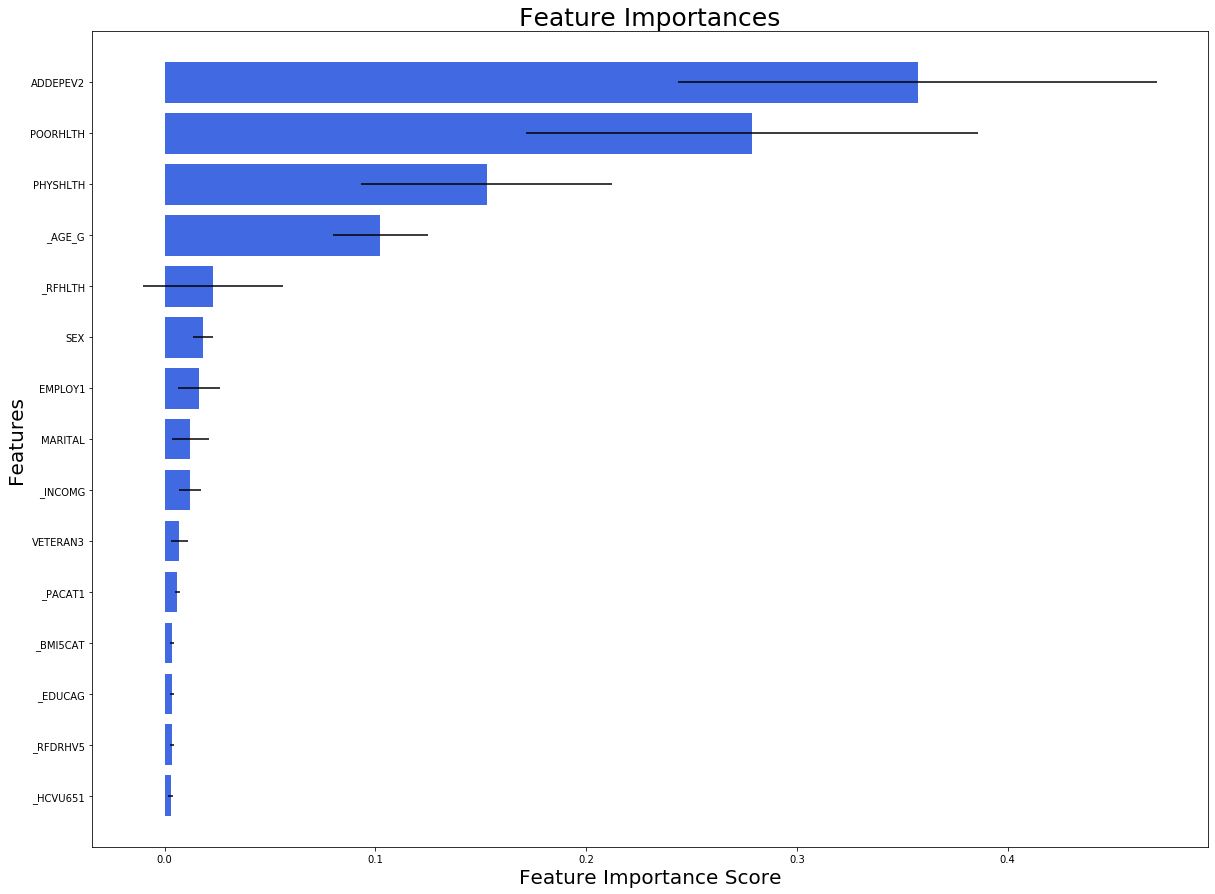

In [21]:
######################################################################################################
# RFC STATS
n_nodes = []
max_depths = []

for ind_tree in RFC_final.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print('\n')    
print("=== RFC STATS ===")   
print(f'OOB score:', RFC_final.oob_score_)
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Average maximum depth: {int(np.mean(max_depths))}')
print(f'Average Sample Split: {int(np.mean(min_samples_split))}')
print(f'Average Samples Leaf: {int(np.mean(min_samples_leaf))}')

#####################################################################################################
# FEATURE IMPORTANCE GRAPH

feature_names = LLCP2.columns # to label features by name, not index
importances = RFC_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_final.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize=(20,15))
plt.title("Feature Importances", Size=25)
plt.xlabel('Feature Importance Score', size=20)
plt.ylabel('Features', size=20)
plt.barh(range(X.shape[1]), importances[indices],
       color="royalblue", xerr=std[indices], align="center")
# To define own labels
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()